In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns 


<Axes: >

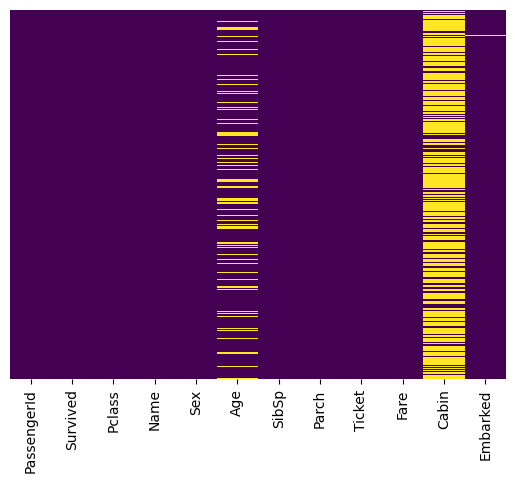

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

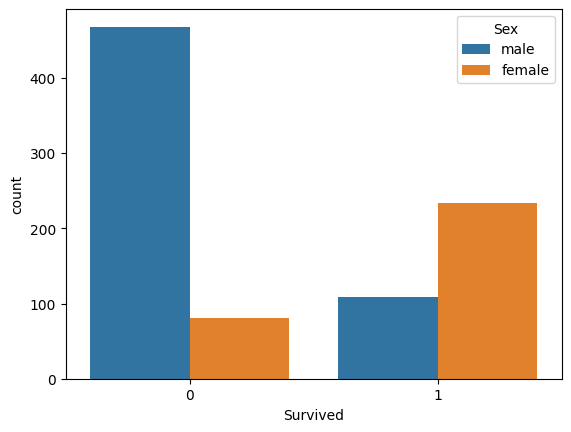

In [6]:
sns.countplot(x='Survived',hue='Sex',data=df)

<Axes: xlabel='Survived', ylabel='count'>

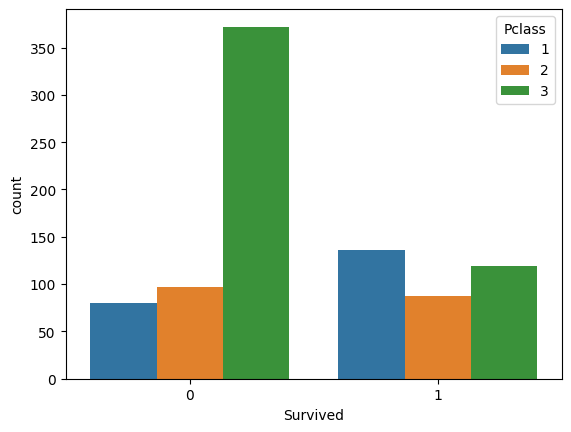

In [7]:
sns.countplot(x='Survived',hue='Pclass',data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


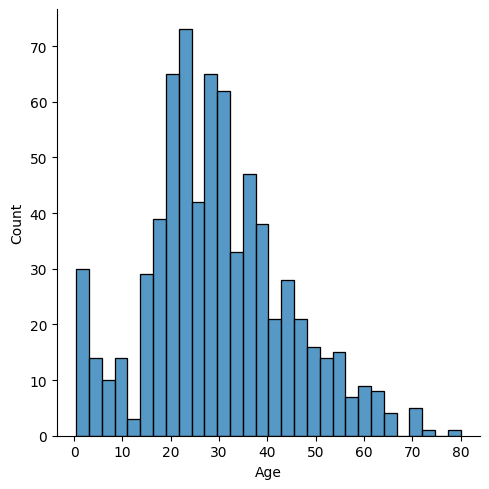

In [8]:
sns.displot(df['Age'].dropna(),bins=30)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

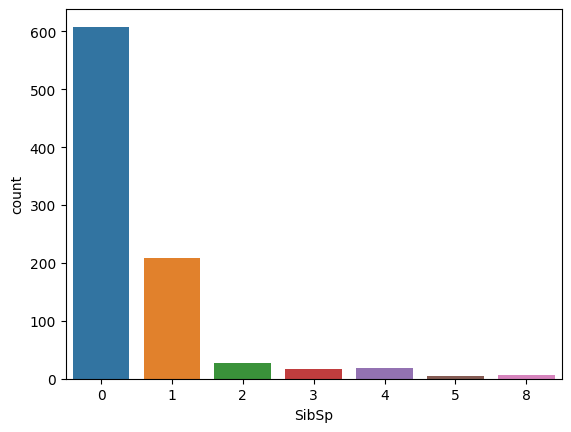

In [10]:
sns.countplot(x='SibSp',data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


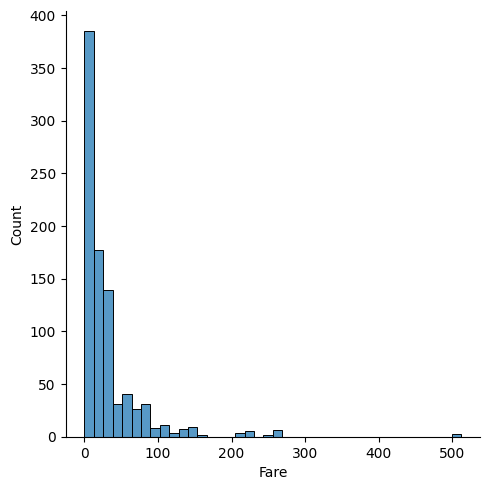

In [11]:
sns.displot(df['Fare'],bins=40)

<Axes: xlabel='Pclass', ylabel='Age'>

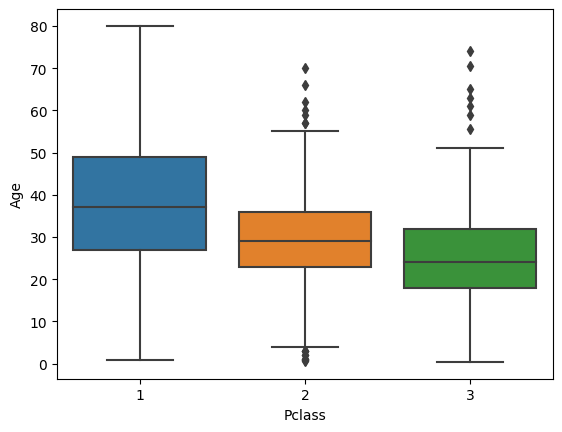

In [12]:
sns.boxplot(data=df,x='Pclass',y='Age')

In [13]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass== 2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

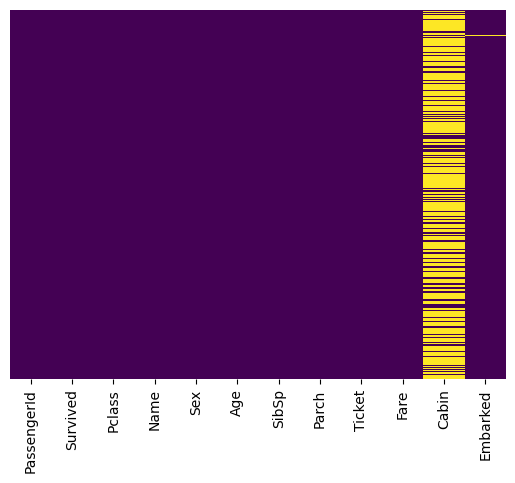

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# We are going to drop   Cabin Coloumn because we can not find more useful feature for our model.
# We can transform Cabin into new feature like "is Cabin is known or Unknown "but we can't get more useful for our model because there  is lots of missing data.

In [16]:
df.drop('Cabin',axis=1,inplace=True)

<Axes: >

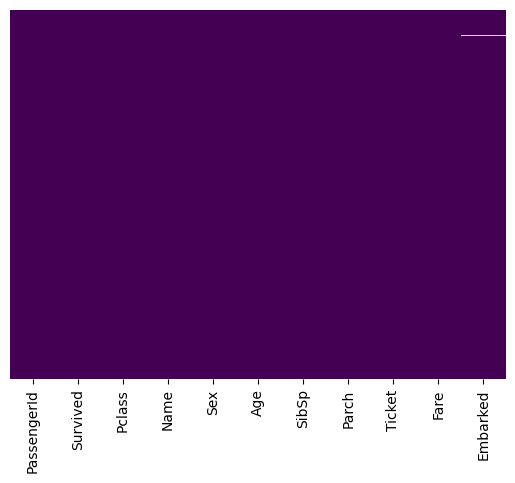

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
df.dropna(inplace=True)

In [19]:
sex=pd.get_dummies(df['Sex'],dtype=float, drop_first = True)

In [20]:
embark=pd.get_dummies(df['Embarked'],dtype=float, drop_first = True)

In [21]:
df=pd.concat([df,sex,embark],axis=1)

In [22]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [24]:
df.drop(['PassengerId'],axis=1,inplace=True)

# WE can convert Pclass coloumn using get_dummies because it is also an catorigal coloumn

In [25]:
df_test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [26]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: >

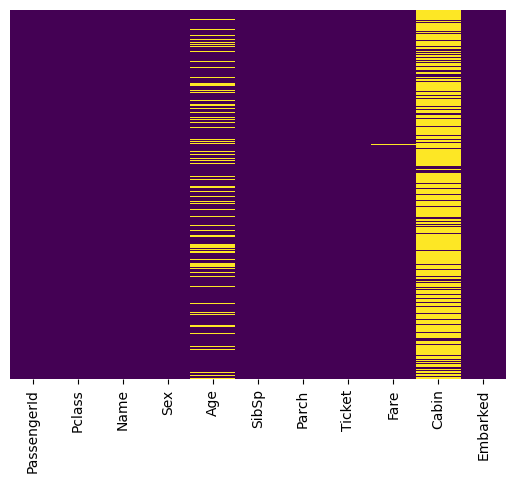

In [27]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<Axes: xlabel='Pclass', ylabel='Age'>

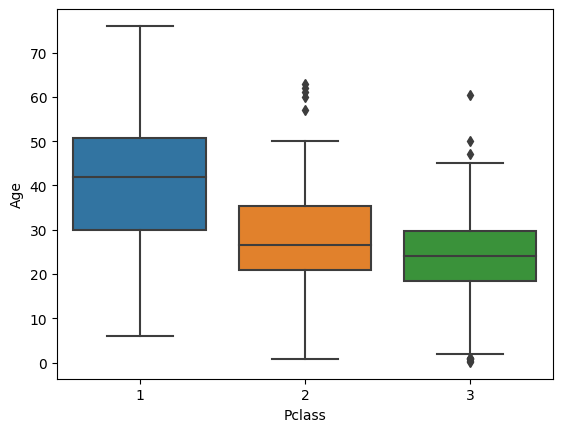

In [29]:
sns.boxplot(data=df_test,x='Pclass',y='Age')

In [30]:
def impute_test_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass== 2:
            return 28
        else:
            return 25
    else:
        return Age

In [31]:
df_test['Age']=df_test[['Age','Pclass']].apply(impute_test_age,axis=1)

<Axes: >

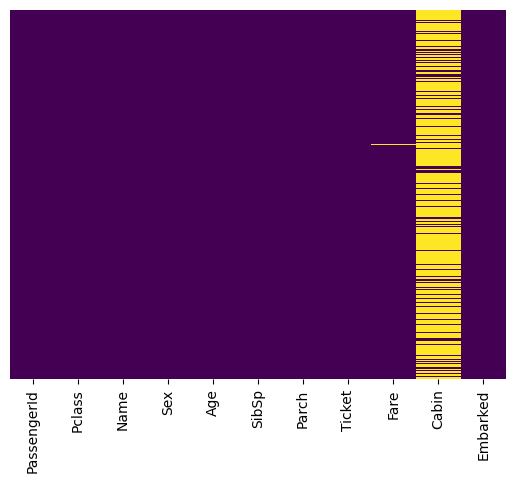

In [32]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
df_test.drop('Cabin',inplace=True,axis=1)

In [34]:
mean_fare=df_test[['Fare']].mean()

In [35]:
mean_fare

Fare    35.627188
dtype: float64

In [36]:
df_test.fillna(mean_fare,inplace=True)

In [37]:
sex_test=pd.get_dummies(df_test['Sex'],dtype=float, drop_first = True)

In [38]:
embark_test=pd.get_dummies(df_test['Embarked'],dtype=float, drop_first = True)

In [39]:
df_test=pd.concat([df_test,sex_test,embark_test],axis=1)

In [40]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0.0,0.0,1.0


In [41]:
test_id=df_test['PassengerId']

In [42]:
df_test.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [43]:
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1.0,1.0,0.0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,1.0,1.0,0.0
3,3,27.0,0,0,8.6625,1.0,0.0,1.0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0


In [44]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logmodel=LogisticRegression(max_iter=1000,random_state=0)

In [47]:
logmodel.fit(X,y)

LogisticRegression(max_iter=1000, random_state=0)

In [48]:
predictions=logmodel.predict(df_test)

In [49]:
from xgboost import XGBClassifier
    

In [50]:
XGB_model = XGBClassifier()
XGB_model.fit(X,y)
    

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [51]:
XGB_pred=XGB_model.predict(df_test) 

In [52]:
#from sklearn.metrics import classification_report,confusion_matrix

In [53]:
#print(classification_report(y,predictions))

In [54]:
df_submission=pd.DataFrame({"PassengerId":test_id.values,"Survived":XGB_pred})

In [55]:
df_submission.to_csv("submission.csv",index=False)

In [56]:
print("Your submission was successfully saved!")

Your submission was successfully saved!
